# Two-Layer Neural Network on Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
data = pd.read_csv('./Dataset/Iris.csv')

In [3]:
data = data.sample(frac=1) # Random shuffling of data for getting better results on validation set
data.head() # Peeking the data after random shuffling

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
10,11,5.4,3.7,1.5,0.2,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [4]:
data.drop(columns=['Id'], inplace=True) # as Id is insignificant is predictions
data.describe() # Some statics of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data = pd.get_dummies(data, dummy_na=False, columns=['Species']) # converting categorical values into integers
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
53,5.5,2.3,4.0,1.3,0,1,0
10,5.4,3.7,1.5,0.2,1,0,0
84,5.4,3.0,4.5,1.5,0,1,0
18,5.7,3.8,1.7,0.3,1,0,0
60,5.0,2.0,3.5,1.0,0,1,0


In [6]:
split = 0.1

X = data.drop(columns=['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'])
Y = data.get(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'])

In [7]:
# Splitting the dataset into train and validation
train_X = np.asarray(X[:-int(split*X.shape[0])])
train_Y = np.asarray(Y[:-int(split*Y.shape[0])])

test_X = np.asarray(X[-int(split*X.shape[0]):])
test_Y = np.asarray(Y[-int(split*Y.shape[0]):])

print('Training data shape:\nX: {}    Y: {}\n\nValidation data shape:\nX: {}    Y: {}'
      .format(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape))

Training data shape:
X: (135, 4)    Y: (135, 3)

Validation data shape:
X: (15, 4)    Y: (15, 3)


In [8]:
def relu(z):
    return np.maximum(z, 0)

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def grad_relu(z):
    z[z<0] = 0
    z[z>=0] = 1
    return z

In [11]:
""" The model of our neural network """

# The fist layer of neural network
W1 = 0.1*np.random.randn(train_X.shape[1], 4)
b1 = 0.1*np.random.randn(1, 4)

# The second layer of neural network
W2 = 0.1*np.random.randn(4, train_Y.shape[1])
b2 = 0.1*np.random.randn(1, train_Y.shape[1])

params = {'W1': W1, 'b1':b1, 'W2': W2, 'b2': b2}

In [12]:
def gradient_descent_neural_net(params, X, Y, learning_rate, num_epochs):
    
    """ Function for optimising the weights iteratively """
    m = X.shape[0] # Number of training examples
    global loss
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    for i in tqdm(range(num_epochs)):
        
        # Forward propagation
        Z1 = np.dot(X, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)
        
        # Loss
        l = 1/m * np.sum((A2 - Y)**2)
        loss.append(l)
        
        # Backward Propagation
        dA2 = 2 * (A2 - Y)
        dZ2 = dA2 * (A2 * (1 - A2))
        dW2 = 1/m * np.dot(A1.T, dZ2)
        db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)
        
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * grad_relu(A1)
        dW1 = 1/m * np.dot(X.T, dZ1)
        db1 = 1/m * np.sum(dZ1, axis=0, keepdims=True)
        
        # Updates
        W1 = W1 - (learning_rate*dW1)
        b1 = b1 - (learning_rate*db1)
        W2 = W2 - (learning_rate*dW2)
        b2 = b2 - (learning_rate*db2)
        
    params['W1'] = W1
    params['b1'] = b1
    params['W2'] = W2
    params['b2'] = b2
    return params

In [13]:
loss = []
params = gradient_descent_neural_net(params, train_X, train_Y, .5*1e-3, 50000)

100%|██████████| 50000/50000 [00:04<00:00, 11374.31it/s]


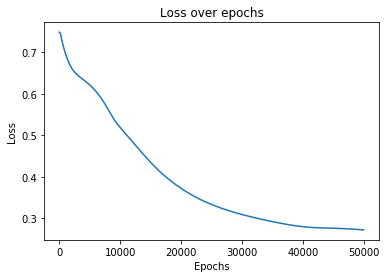

In [14]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()

In [15]:
def make_predictions(params, X):
        
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    return A2

In [16]:
pred = make_predictions(params, test_X)
pred = np.asarray(pred)
test_Y = np.asarray(test_Y)
acc = 1/test_X.shape[0]*np.sum(np.equal(np.argmax(pred, axis=1), np.argmax(test_Y, axis=1))).astype(np.float32) * 100
print('Accuracy on test data: {}%'.format(acc))

Accuracy on test data: 100.0%
